<a href="https://colab.research.google.com/github/secutron/TesTime/blob/main/VanillaGAN_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ** TF2 Keras Vanilla Gan Tutorial

####ToDo : TF2 Keras 기반 Vanilla GAN을 이용해 Collab에서 MNIST 데이터를 생성해본다

####- 본 코드는 [테디노트](https://teddylee777.github.io/tensorflow/vanilla-gan)님 글을 기반으로 작성했음을 밝힙니다.

####- [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4) 위키 정보

: 숫자 영상

: 크기는 28x28

: 수량은 train용 60K, test용 10K samples로 구성

: 화소값 범위는 0~255이며, 0부터 9까지 10 class로 구성


### Tensorflow 모듈을 import하고 버전을 확인합니다.

In [37]:
#@title TF2 Keras
#@markdown secutron@naver.com

import tensorflow as tf
print(tf.__version__)

2.3.0


### MNIST 데이터를 불러들이고, 형식에 맞추어 준비합니다.

In [33]:
# 데이터를 준비합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [34]:
# mnist 데이터 형태를 확인합니다.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

"""
가로 28픽셀, 세로 28픽셀 크기 영상 그리고 각 영상에 해당하는 레이블이 학습용으로 6만개 테스트용으로는 1만개 있음을 알 수 있습니다. 
"""

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


'\n가로 28픽셀, 세로 28픽셀 크기 영상 그리고 각 영상에 해당하는 레이블이 학습용으로 6만개 테스트용으로는 1만개 있음을 알 수 있습니다. \n'

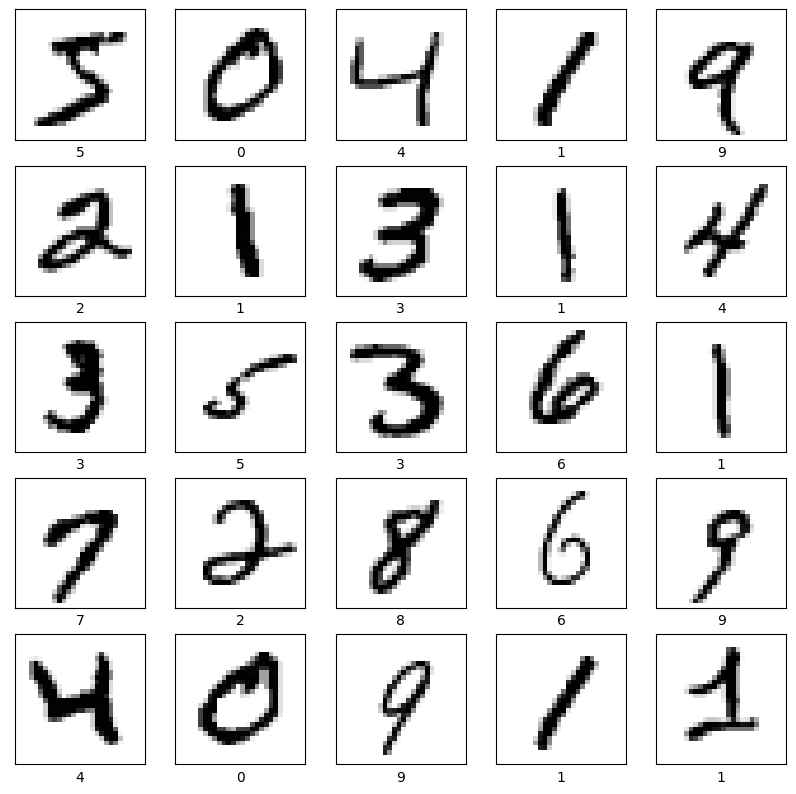

In [35]:
# 영상 일부(앞쪽 25장)를 확인해 봅니다
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10), dpi=100)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.savefig("result.png", c="a")
plt.show()

In [36]:
# 데이터를 형식에 맞도록 변형합니다
x_tr = x_train.reshape(-1, 28*28).astype('float32') / 127.5 -1
assert x_tr.min() >= -1.0 and x_t.max() <= 1.0 
x_te = x_test.reshape(-1,28*28).astype('float32') / 127.5 -1
assert x_te.min() >= -1.0 and x_te.max() <= 1.0 

"""
Vanillar GAN의 generator 부분에서는 activation으로 tanh를 사용합니다.
tanh를 활용하면 output이 -1 ~ 1 사이로 나오기 때문에 이에 맞추어 주는 것이 좋습니다. 이를 위해 train 및 test dataset을 127.5로 나눈 뒤 1을 빼줍니다.
그리고 assert 문을 이용해 결과값의 범위를 확인합니다. 참고로 assert문에 이상이 없을 경우 아무런 표시 없이 정상 수행됩니다.

또한 상기 코드에서는 초보자들이 많이 하는 실수를 막기 위해 x_tr = xtrain.reshape(... 와 같이 새로운 변수를 할당하는 방식으로 작성하였습니다.
만일 자기 자신을 갱신, 즉 x_train = xtrain.reshape(... 와 같이 코드를 작성하는 경우, 해당 코드 블럭을 클릭할 때마다 값이 계속 변경되는 것에 주의해야 합니다.
"""

NameError: ignored

필요한 모듈을 import 합니다.

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import numpy as np

## Hyperparameters

`NOISE_DIM`을 정의 합니다.

NOISE_DIM은 자유롭게 설정할 수 있으며, generator의 **input**으로 들어갑니다.

In [ ]:
# gan에 입력되는 noise에 대한 dimension
NOISE_DIM = 10

# adam optimizer 정의, learning_rate = 0.0002, beta_1로 줍니다.
# Vanilla Gan과 DCGAN에서 이렇게 셋팅을 해주는데
# 이렇게 해줘야 훨씬 학습을 잘합니다.
adam = Adam(lr=0.0002, beta_1=0.5)

## Generator

generator를 정의합니다.

In [ ]:
generator = Sequential([
    Dense(256, input_dim=NOISE_DIM), 
    LeakyReLU(0.2), 
    Dense(512), 
    LeakyReLU(0.2), 
    Dense(1024), 
    LeakyReLU(0.2), 
    Dense(28*28, activation='tanh'),
])

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2816      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

## Discriminator

discriminator를 정의합니다.

In [ ]:
discriminator = Sequential([
    Dense(1024, input_shape=(784,), kernel_initializer=RandomNormal(stddev=0.02)),
    LeakyReLU(0.2), 
    Dropout(0.3), 
    Dense(512),
    LeakyReLU(0.2), 
    Dropout(0.3), 
    Dense(256),
    LeakyReLU(0.2), 
    Dropout(0.3), 
    Dense(1, activation='sigmoid')
])

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

반드시 dicriminator를 **compile** 해주어야 합니다.

In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

## Gan

generator와 discriminator를 연결합니다.

In [ ]:
# discriminator는 학습을 하지 않도록 하며, Gan 모델에서는 generator만 학습하도록 합니다.
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
x = generator(inputs=gan_input)
output = discriminator(x)

gan 모델을 정의합니다.

In [ ]:
gan = Model(gan_input, output)

In [ ]:
gan.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1463312   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,923,537
Trainable params: 1,463,312
Non-trainable params: 1,460,225
_________________________________________________________________


## Compile

In [ ]:
gan.compile(loss='binary_crossentropy', optimizer=adam)

## Batch

이미지 batch를 생성합니다. MNIST 이미지 batch가 차례대로 생성됩니다.

In [ ]:
def get_batches(data, batch_size):
    batches = []
    for i in range(int(data.shape[0] // batch_size)):
        batch = data[i * batch_size: (i + 1) * batch_size]
        batches.append(batch)
    return np.asarray(batches)

##  시각화를 위한 유틸 함수 정의

In [ ]:
def visualize_training(epoch, d_losses, g_losses):
    # 오차에 대한 시각화
    plt.figure(figsize=(8, 4))
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generatror Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    print('epoch: {}, Discriminator Loss: {}, Generator Loss: {}'.format(epoch, np.asarray(d_losses).mean(), np.asarray(g_losses).mean()))
    
    #샘플 데이터 생성 후 시각화
    noise = np.random.normal(0, 1, size=(24, NOISE_DIM))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(-1, 28, 28)
    
    plt.figure(figsize=(8, 4))
    for i in range(generated_images.shape[0]):
        plt.subplot(4, 6, i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
t = get_batches(x_train, 128)
t.shape

(468, 128, 784)

## 학습

In [ ]:
BATCH_SIZE = 128
EPOCHS= 50

In [ ]:
input_noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, NOISE_DIM])
input_noise[0]

array([ 0.53913739,  0.25756321, -0.70227051,  0.82043253, -0.22560918,
        0.41121863, -0.99352393, -0.48670815, -0.54815514,  0.80851374])

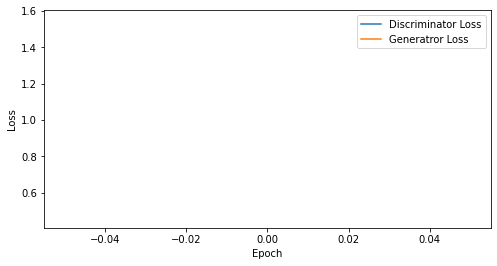

epoch: 1, Discriminator Loss: 0.4622935652732849, Generator Loss: 1.5491206645965576


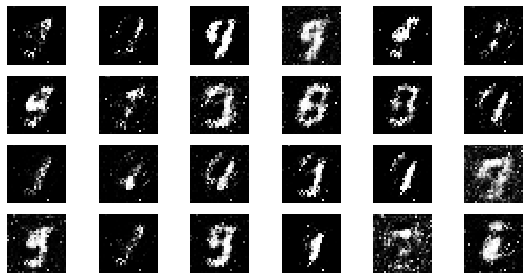

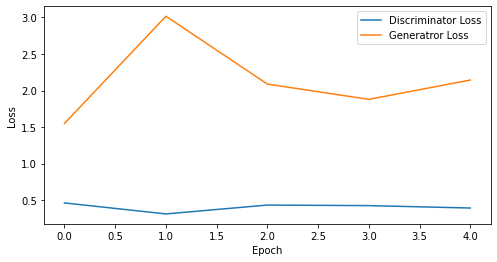

epoch: 5, Discriminator Loss: 0.4051549851894379, Generator Loss: 2.1348954677581786


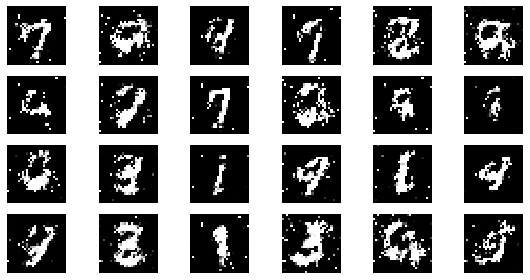

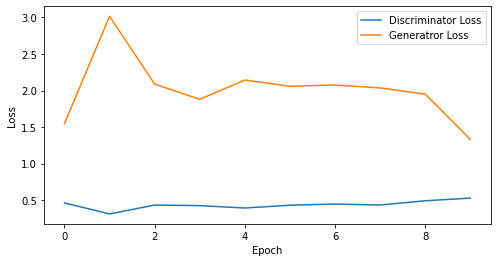

epoch: 10, Discriminator Loss: 0.4358061611652374, Generator Loss: 2.012491822242737


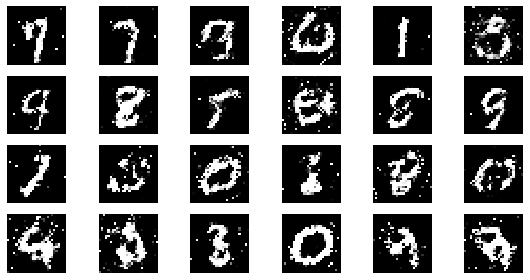

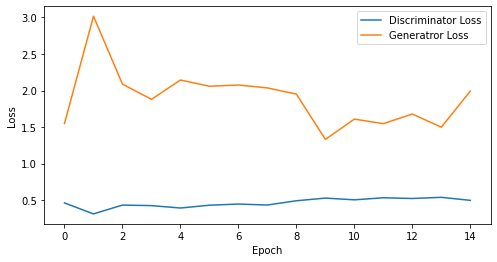

epoch: 15, Discriminator Loss: 0.46366599400838215, Generator Loss: 1.8966099739074707


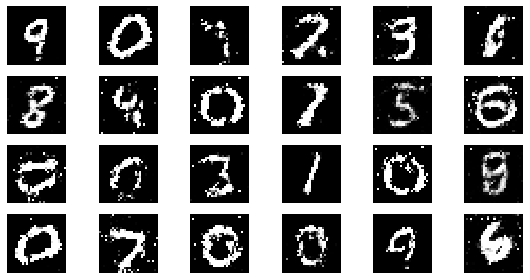

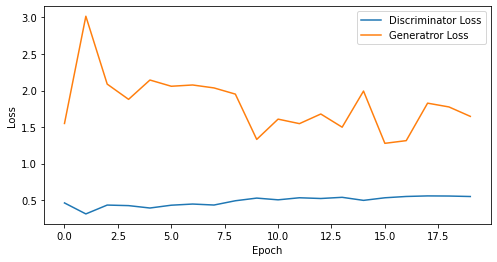

epoch: 20, Discriminator Loss: 0.4851728767156601, Generator Loss: 1.8144534289836884


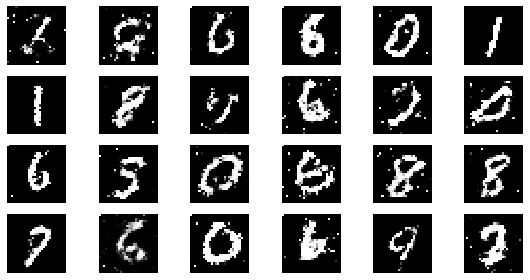

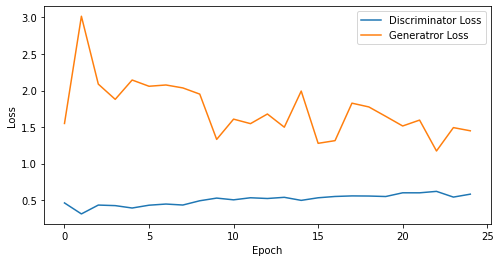

epoch: 25, Discriminator Loss: 0.5059874343872071, Generator Loss: 1.7405228757858275


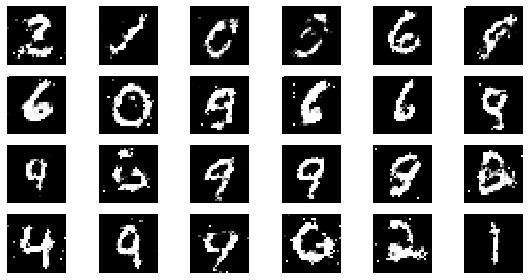

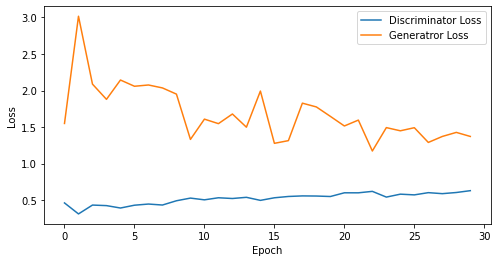

epoch: 30, Discriminator Loss: 0.5216337581475575, Generator Loss: 1.6821386496225992


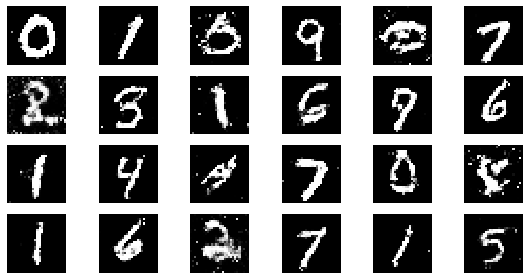

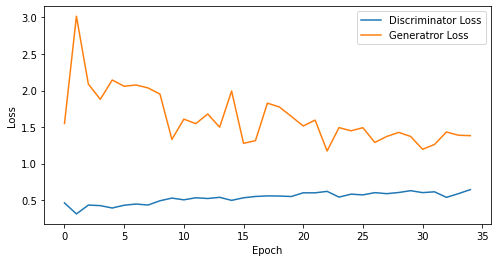

epoch: 35, Discriminator Loss: 0.5325275216783796, Generator Loss: 1.632161773954119


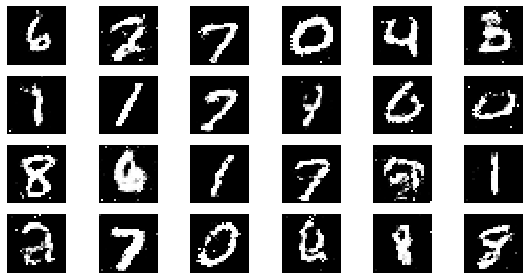

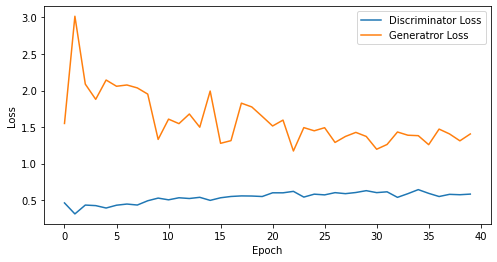

epoch: 40, Discriminator Loss: 0.5379770860075951, Generator Loss: 1.5995181620121002


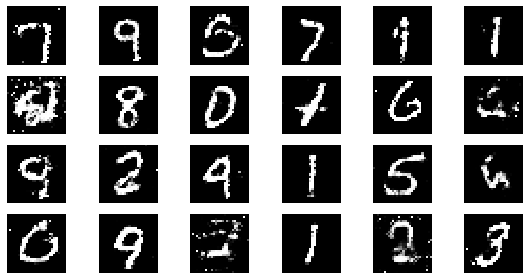

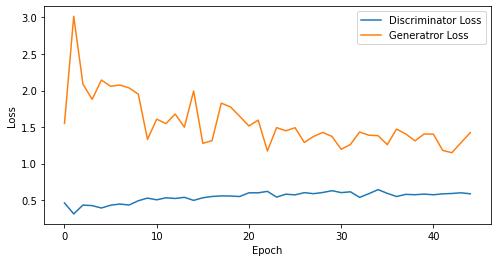

epoch: 45, Discriminator Loss: 0.5435314430130853, Generator Loss: 1.565014698770311


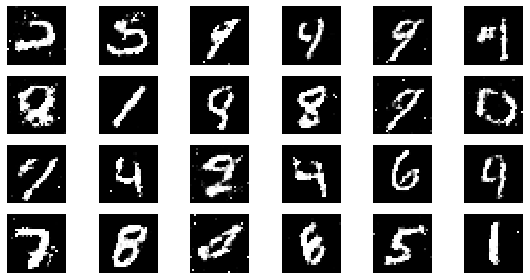

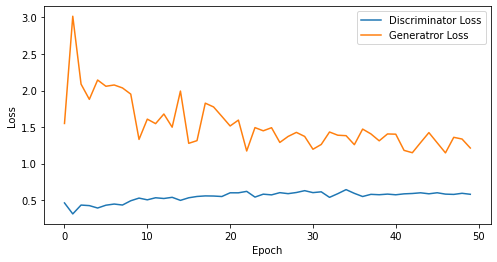

epoch: 50, Discriminator Loss: 0.5479342043399811, Generator Loss: 1.5353350019454957


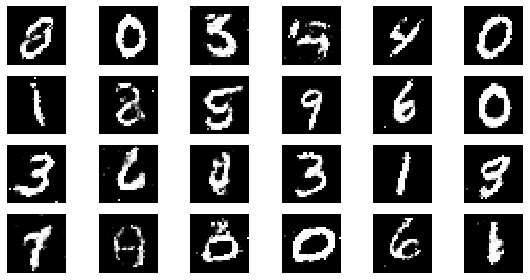

In [ ]:
# discriminator와 gan 모델의 loss 측정을 위한 list 입니다.
d_losses = []
g_losses = []

for epoch in range(1, EPOCHS + 1):
    # 각 배치별 학습
    for real_images in get_batches(x_train, BATCH_SIZE):
        # 랜덤 노이즈 생성
        input_noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, NOISE_DIM])
        
        # 가짜 이미지 데이터 생성
        generated_images = generator.predict(input_noise)
        
        # Gan에 학습할 X 데이터 정의
        x_dis = np.concatenate([real_images, generated_images])
        
        # Gan에 학습할 Y 데이터 정의
        y_dis = np.zeros(2 * BATCH_SIZE)
        y_dis[:BATCH_SIZE] = 0.9
        
        # Discriminator 훈련
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x_dis, y_dis)
        
        # Gan 훈련
        noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, NOISE_DIM])
        y_gan = np.ones(BATCH_SIZE)
        
        # Discriminator의 판별 학습을 방지합니다
        # real data는 생성기에 영향을 주지 않으므로 생략!
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gan)
        
    d_losses.append(d_loss)
    g_losses.append(g_loss)

    if epoch == 1 or epoch % 5 == 0:
        visualize_training(epoch, d_losses, g_losses)